In [2]:
from langgraph.graph import StateGraph , START,END
from langchain_groq import ChatGroq
from typing import TypedDict
from dotenv import load_dotenv
import os

In [3]:
load_dotenv()

True

In [4]:
model = ChatGroq(
    model="llama-3.1-8b-instant",
    groq_api_key = os.getenv("Groq_api")
)

In [5]:
# create a state
class BlogState(TypedDict):

    title: str
    outline:str
    content:str

In [6]:
def create_outline(state:BlogState) -> BlogState:

    # fetch title 
    title = state['title']

    # call llm gen outline
    prompt = f'Gnerate a detailed outline for a blog on the topic - {title}'
    outline = model.invoke(prompt).content

    # update state
    state['outline'] = outline

    return state

In [7]:
def create_blog(state:BlogState) -> BlogState:

    title = state['title']
    outline = state['outline']

    prompt = f'Write a detailed blog on the title -{title} using the following outline \n {outline}'

    content = model.invoke(prompt).content

    state['content'] = content

    return state



In [8]:
# create a graph

graph = StateGraph(BlogState)

# add nodes
graph.add_node('create_outline',create_outline)
graph.add_node('create_blog',create_blog)

# add edges
graph.add_edge(START,'create_outline')
graph.add_edge('create_outline','create_blog')
graph.add_edge('create_outline',END)

# compile
workflow = graph.compile()

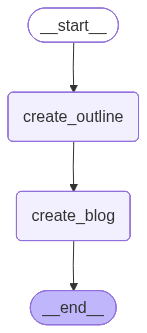

In [9]:
workflow

In [11]:
# execute
intial_state = {'title': 'Rise of AI in India'}
final_state = workflow.invoke(intial_state)
print(final_state)

{'title': 'Rise of AI in India', 'outline': '**Title:** "The Rise of AI in India: Unlocking Opportunities and Challenges"\n\n**I. Introduction**\n\n* Brief overview of Artificial Intelligence (AI) and its increasing importance worldwide\n* Importance of India in the global AI landscape\n* Thesis statement: India is rapidly emerging as a hub for AI innovation, driven by government initiatives, growing demand for AI-powered solutions, and a thriving startup ecosystem.\n\n**II. Government Support and Initiatives**\n\n* Overview of government initiatives, such as:\n + Digital India program\n + Make in India initiative\n + Start-up India scheme\n* Specific policies and programs aimed at promoting AI development, such as:\n + National AI Portal\n + AI for All initiative\n + AI R&D funding programs\n* Analysis of the impact of government support on the growth of AI in India\n\n**III. AI Adoption in India**\n\n* Overview of the current state of AI adoption in India across various sectors, such

In [12]:
print(final_state['outline'])

**Title:** "The Rise of AI in India: Unlocking Opportunities and Challenges"

**I. Introduction**

* Brief overview of Artificial Intelligence (AI) and its increasing importance worldwide
* Importance of India in the global AI landscape
* Thesis statement: India is rapidly emerging as a hub for AI innovation, driven by government initiatives, growing demand for AI-powered solutions, and a thriving startup ecosystem.

**II. Government Support and Initiatives**

* Overview of government initiatives, such as:
 + Digital India program
 + Make in India initiative
 + Start-up India scheme
* Specific policies and programs aimed at promoting AI development, such as:
 + National AI Portal
 + AI for All initiative
 + AI R&D funding programs
* Analysis of the impact of government support on the growth of AI in India

**III. AI Adoption in India**

* Overview of the current state of AI adoption in India across various sectors, such as:
 + Healthcare
 + Finance
 + Education
 + E-commerce
* Success 

In [13]:
print(final_state['content'])

**The Rise of AI in India: Unlocking Opportunities and Challenges**

**I. Introduction**

Artificial Intelligence (AI) has been revolutionizing industries worldwide, transforming the way businesses operate, and creating new opportunities for growth and innovation. As AI continues to advance, India is emerging as a significant hub for AI innovation, driven by government initiatives, growing demand for AI-powered solutions, and a thriving startup ecosystem. This blog will explore the rise of AI in India, highlighting the opportunities, challenges, and key players in this rapidly evolving landscape.

India's importance in the global AI landscape cannot be overstated. With a large and skilled workforce, a growing economy, and a strong focus on innovation, India is poised to become a leading player in the global AI market. The Indian government has recognized the potential of AI and has launched several initiatives to promote its development and adoption.

**II. Government Support and Initi